===== initialize =====


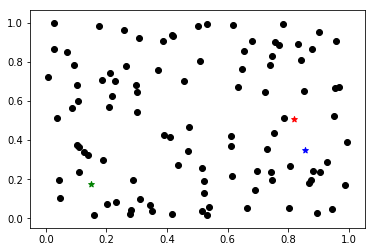

===== epoch 1 =====
> cluster


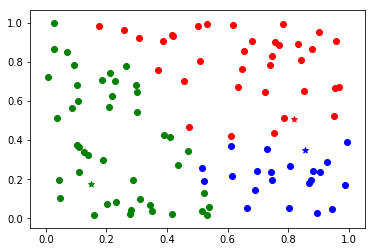

> recenter


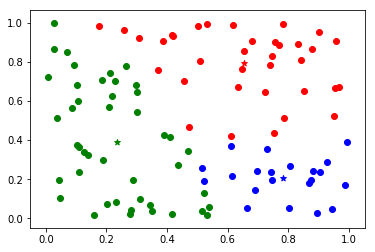

===== epoch 2 =====
> cluster


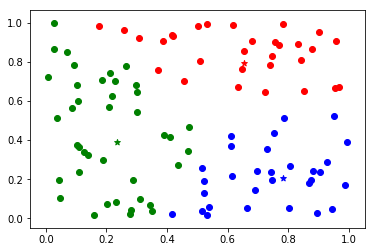

> recenter


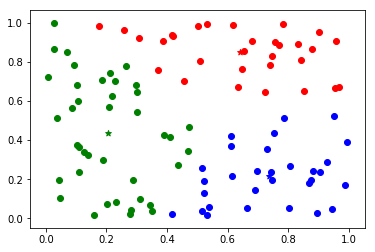

===== epoch 3 =====
> cluster


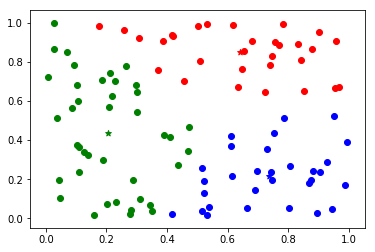

> recenter


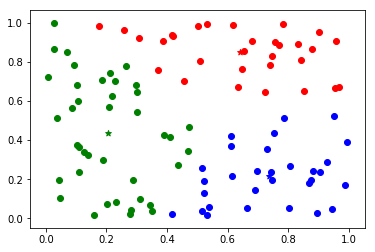

===== data =====
           x         y  cat
0   0.531800  0.017165    2
1   0.522644  0.131557    2
2   0.539495  0.055818    2
3   0.881462  0.242905    2
4   0.296913  0.681899    1
5   0.831508  0.890333    0
6   0.753647  0.436720    2
7   0.985708  0.172549    2
8   0.696967  0.243384    2
9   0.508092  0.803346    0
10  0.635125  0.670278    0
11  0.646378  0.761592    0
12  0.436185  0.269953    1
13  0.071379  0.850722    1
14  0.158902  0.015716    1
15  0.747055  0.827952    0
16  0.419350  0.929813    0
17  0.729348  0.355465    2
18  0.955731  0.906649    0
19  0.110659  0.236235    1
20  0.722944  0.644233    0
21  0.110096  0.363068    1
22  0.953459  0.663284    0
23  0.784916  0.510957    2
24  0.101686  0.682118    1
25  0.410655  0.414272    1
26  0.869760  0.178190    2
27  0.288231  0.195003    1
28  0.263323  0.778000    1
29  0.390295  0.427165    1
..       ...       ...  ...
70  0.045203  0.102051    1
71  0.609368  0.371320    2
72  0.746174  0.195325    2
73 

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 最多支持显示 len(COLOR) - 1 种类别
COLOR = ['red', 'green', 'blue', 'yellow', 'black']
MAX_K = len(COLOR) - 1
MIN_D = 0.01

# 随机生成 100 个坐标点
def random_data():
    # 随机生成 100*2 个数字
    xs = np.random.rand(100)
    ys = np.random.rand(100)
    # 将这 100*2 个数字分配给横纵坐标
    flat = list(zip(xs, ys))
    res = pd.DataFrame(flat, columns=['x', 'y'])
    # 初始化其类别为 -1
    res['cat'] = -1
    return res

# 随机生成 k 个初始中心
def random_center(k):
    res = []
    for i in range(k):
        center = {}
        x = np.random.rand(1)[0]
        y = np.random.rand(1)[0]
        center['x'] = x
        center['y'] = y
        # 同时也确定了类别
        center['cat'] = i
        res.append(center)
    return res

# 绘制坐标点
def paint(dots, centers):
    fig = plt.figure()
    # 坐标点用圆形表示
    for i in range(len(dots)):
        plt.scatter(dots['x'][i], dots['y'][i], color=COLOR[dots['cat'][i]])
    # 簇中心用星号表示
    for i in range(len(centers)):
        plt.scatter(centers[i]['x'], centers[i]['y'], color=COLOR[centers[i]['cat']], marker='*')
    plt.show()

# 计算距离
def dis(x1, y1, x2, y2):
    # 欧氏距离
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# 分簇
def cluster(dots, centers):
    for i in range(len(dots)):
        min_dis = 2
        c = -1
        # 选择最近的中心点分簇
        for j in range(len(centers)):
            d = dis(dots['x'][i], dots['y'][i], centers[j]['x'], centers[j]['y'])
            if d < min_dis:
                min_dis = d
                c = j
        dots.loc[i, 'cat'] = c

# 重新计算中心
def reset_center(dots, K):
    # [total_num, x_sum, y_sum]
    counter = np.zeros((K, 3))
    for i in range((len(dots))):
        counter[dots['cat'][i]][0] += 1
        counter[dots['cat'][i]][1] += dots['x'][i]
        counter[dots['cat'][i]][2] += dots['y'][i]
    # 用均值生成新的中心
    res = []
    for i in range(K):
        center = {}
        center['x'] = counter[i][1] / counter[i][0]
        center['y'] = counter[i][2] / counter[i][0]
        center['cat'] = i
        res.append(center)
    return res

# 判断新旧中心距离是否足够小, 可以终止迭代
def judge(old_center, new_center):
    res = True
    for i in range(len(old_center)):
        d = dis(old_center[i]['x'], old_center[i]['y'], new_center[i]['x'], new_center[i]['y'])
        res = res and (d < MIN_D)
    return res

def k_means(k, data):
    print('===== initialize =====')
    center = random_center(k)
    paint(data, center)
    epoch = 1
    while True:
        print('===== epoch %d =====' % epoch)
        # 分簇后的结果
        print('> cluster')
        cluster(data, center)
        paint(data, center)
        # 中心坐标变化
        print('> recenter')
        new_center = reset_center(data, k)
        paint(data, new_center)
        # 若中心偏移小于阈值, 认为已收敛
        if judge(center, new_center):
            break
        center = new_center
        epoch += 1
    # 打印最终的分类结果和中心坐标
    print('===== data =====')
    print(data)
    print('===== center =====')
    print(center)

K = 3
dots = random_data()
k_means(K, dots)